About Dataset

Data of ATM transaction of XYZ bank

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as po
po.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 8,5
# plt.style.use('fivethirtyeight')

In [2]:
atm = pd.read_csv('AggregatedData.csv')
atm.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,WHH


In [3]:
atm.isnull().sum()

ATM Name                        0
Transaction Date                0
No Of Withdrawals               0
No Of XYZ Card Withdrawals      0
No Of Other Card Withdrawals    0
Total amount Withdrawn          0
Amount withdrawn XYZ Card       0
Amount withdrawn Other Card     0
Weekday                         0
Festival Religion               0
Working Day                     0
Holiday Sequence                0
dtype: int64

In [4]:
atm.duplicated().sum()

0

In [5]:
atm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11589 entries, 0 to 11588
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ATM Name                      11589 non-null  object
 1   Transaction Date              11589 non-null  object
 2   No Of Withdrawals             11589 non-null  int64 
 3   No Of XYZ Card Withdrawals    11589 non-null  int64 
 4   No Of Other Card Withdrawals  11589 non-null  int64 
 5   Total amount Withdrawn        11589 non-null  int64 
 6   Amount withdrawn XYZ Card     11589 non-null  int64 
 7   Amount withdrawn Other Card   11589 non-null  int64 
 8   Weekday                       11589 non-null  object
 9   Festival Religion             11589 non-null  object
 10  Working Day                   11589 non-null  object
 11  Holiday Sequence              11589 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


In [6]:
atm['Weekday'].sample(5)

959        Monday
7086     THURSDAY
4758       SUNDAY
9839    WEDNESDAY
6852     SATURDAY
Name: Weekday, dtype: object

Data Cleaning


In [7]:
# renaming columns for easy accessing
atm = atm.rename(columns={
    'ATM Name':'atm_name',
    'Transaction Date':'transaction_date',
    'No Of Withdrawals':'no_of_withdrawals',
    'No Of XYZ Card Withdrawals':'xyz_card_withdrawals',
    'No Of Other Card Withdrawals':'other_card_withdrawals',
    'Total amount Withdrawn':'total_amt_withdrawn',
    'Amount withdrawn XYZ Card':'amt_withdrawn_xyz',
    'Amount withdrawn Other Card':'amt_withdrawn_other',
    'Weekday':'wkday',
    'Festival Religion':'festival_region',
    'Working Day':'working_day',
    'Holiday Sequence':'holiday_sequence'
})

In [8]:
# Change transaction date to date data type
atm.transaction_date = pd.to_datetime(atm.transaction_date, infer_datetime_format=True)

c:\Users\okoro\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '13-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\okoro\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '14-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\okoro\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '15-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\okoro\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '16-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\okoro\AppDa

In [9]:
# Change all weekdays to title case
atm['wkday'] = atm['wkday'].str.title()

In [10]:
atms = atm.groupby('atm_name')[['no_of_withdrawals', 'xyz_card_withdrawals', 'other_card_withdrawals']].sum()
atms_amt = atm.groupby('atm_name')[['total_amt_withdrawn', 'amt_withdrawn_xyz', 'amt_withdrawn_other']].mean()


In [11]:
trace = px.line(atms,
                x=atms.index,
                y='no_of_withdrawals', width=700,
                markers=True, text='no_of_withdrawals',
                title= 'Total number of withdrawals at each ATM',
                labels={'atm_name':'', 'no_of_withdrawals':'Number of withdrawals'})

trace.update_yaxes(showticklabels=False)
trace.update_traces(texttemplate='%{text:.2s}', textposition='top center')
trace.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=atms.index, y=atms.xyz_card_withdrawals, 
                         name='XYZ Cards', line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=atms.index, y=atms.other_card_withdrawals,
                         name='Other Card', line=dict(color='royalblue', width=4, dash='dot')))
fig.update_layout(title='Total number of withdrawals by cards',
                  yaxis_title = 'Number of withdrawals',
                  width=750)
fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=atms_amt.index, y=atms_amt.amt_withdrawn_xyz, 
                         name='XYZ Cards', line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=atms_amt.index, y=atms_amt.amt_withdrawn_other,
                         name='Other Card', line=dict(color='royalblue', width=4, dash='dot')))
fig.update_layout(title='Average amount of withdrawals by cards',
                  yaxis_title = 'Average amount',
                  width=750)
fig.show()

In [12]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
atms = atm.groupby('wkday')[['no_of_withdrawals', 'xyz_card_withdrawals', 'other_card_withdrawals']].sum().reindex(days)
atms_amt = atm.groupby('wkday')[['total_amt_withdrawn', 'amt_withdrawn_xyz', 'amt_withdrawn_other']].mean().reindex(days)


In [13]:
trace = px.line(atms,
                x=atms.index,
                y='no_of_withdrawals', width=700,
                markers=True, text='no_of_withdrawals',
                title= 'Total number of withdrawals at each ATM',
                labels={'atm_name':'', 'no_of_withdrawals':'Number of withdrawals'})

trace.update_yaxes(showticklabels=False)
trace.update_traces(texttemplate='%{text:.2s}', textposition='top center')
trace.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=atms.index, y=atms.xyz_card_withdrawals, 
                         name='XYZ Cards', line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=atms.index, y=atms.other_card_withdrawals,
                         name='Other Card', line=dict(color='royalblue', width=4, dash='dot')))
fig.update_layout(title='Total number of withdrawals by cards',
                  yaxis_title = 'Number of withdrawals',
                  width=750)
fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=atms_amt.index, y=atms_amt.amt_withdrawn_xyz, 
                         name='XYZ Cards', line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=atms_amt.index, y=atms_amt.amt_withdrawn_other,
                         name='Other Card', line=dict(color='royalblue', width=4, dash='dot')))
fig.update_layout(title='Average amount of withdrawals by cards',
                  yaxis_title = 'Average amount',
                  width=750)
fig.show()

In [14]:
atms = atm.groupby('holiday_sequence')[['no_of_withdrawals', 'xyz_card_withdrawals', 'other_card_withdrawals']].sum()
atms_amt = atm.groupby('holiday_sequence')[['total_amt_withdrawn', 'amt_withdrawn_xyz', 'amt_withdrawn_other']].mean()


In [15]:
trace = px.line(atms,
                x=atms.index,
                y='no_of_withdrawals', width=700,
                markers=True, text='no_of_withdrawals',
                title= 'Total number of withdrawals at each ATM',
                labels={'atm_name':'', 'no_of_withdrawals':'Number of withdrawals'})

trace.update_yaxes(showticklabels=False)
trace.update_traces(texttemplate='%{text:.2s}', textposition='top center')
trace.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=atms.index, y=atms.xyz_card_withdrawals, 
                         name='XYZ Cards', line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=atms.index, y=atms.other_card_withdrawals,
                         name='Other Card', line=dict(color='royalblue', width=4, dash='dot')))
fig.update_layout(title='Total number of withdrawals by cards',
                  yaxis_title = 'Number of withdrawals',
                  width=750)
fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=atms_amt.index, y=atms_amt.amt_withdrawn_xyz, 
                         name='XYZ Cards', line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=atms_amt.index, y=atms_amt.amt_withdrawn_other,
                         name='Other Card', line=dict(color='royalblue', width=4, dash='dot')))
fig.update_layout(title='Average amount of withdrawals by cards',
                  yaxis_title = 'Average amount',
                  width=750)
fig.show()

In [16]:
trace = go.Scatter(
    x=atm.no_of_withdrawals,
    y=atm.total_amt_withdrawn,
    mode = 'markers'
)
data = [trace]

fig = dict(data=data)
po.iplot(fig)

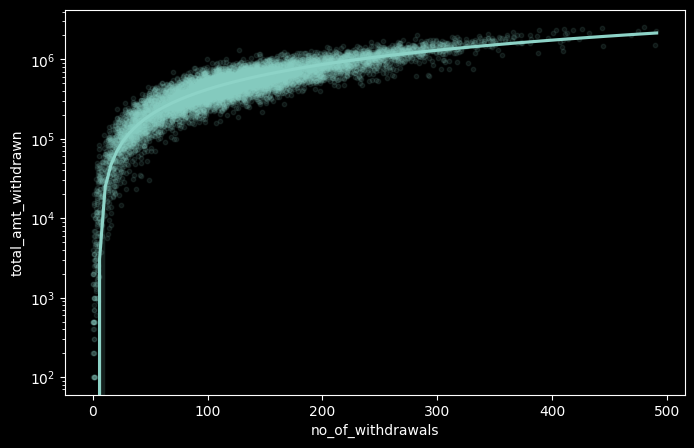

In [36]:
sb.regplot(data=atm, x= 'no_of_withdrawals', y='total_amt_withdrawn',
           x_jitter= 0.8, scatter_kws={'alpha':0.1, 's':10})
plt.yscale('log');

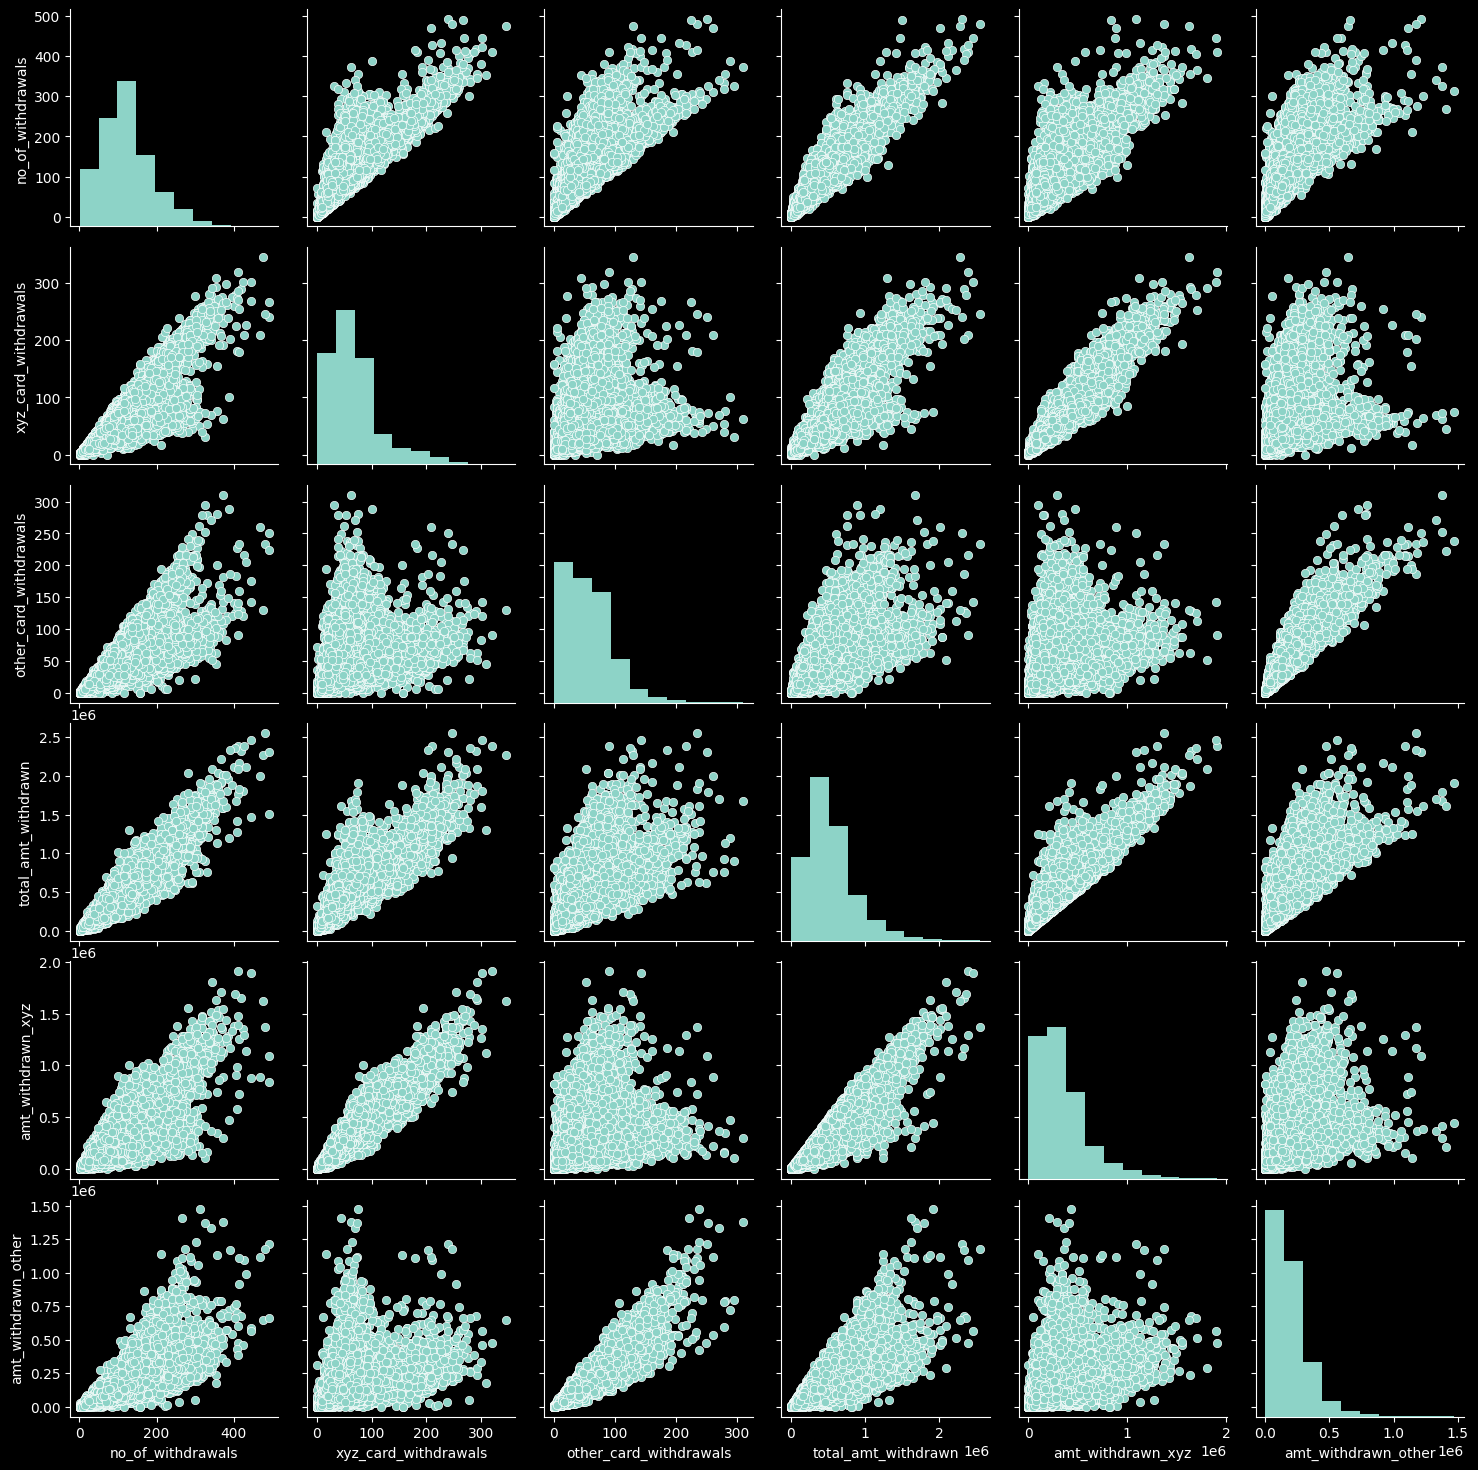

In [38]:
g = sb.PairGrid(data=atm, vars=['no_of_withdrawals', 'xyz_card_withdrawals', 'other_card_withdrawals', 
                                'total_amt_withdrawn', 'amt_withdrawn_xyz', 'amt_withdrawn_other'])
g = g.map_offdiag(sb.scatterplot)
g.map_diag(plt.hist);